In [379]:
from sklearn import model_selection
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import seaborn as sns
from sklearn import model_selection
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import seaborn as sns
import pandas as pd
import os
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib.ticker import PercentFormatter
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Settando configurações padrão para todos os modelos

In [380]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [381]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

In [382]:
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

In [383]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [384]:
X = df.drop(columns=["Alcoolismo e Depressão", "Diagnóstico de depressão", "Diagnóstico de alcoolismo"], axis=1)
Y = df["Diagnóstico de depressão"]


print("X:", len(X), "Y:", len(Y))

X: 1614 Y: 1614


In [385]:
test_size = 0.4 # Tamanho do conjunto de teste

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [386]:
X_train

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida
471,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1399,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
319,0.50,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0
1416,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1340,0.50,0.666667,1.0,1.000000,0.714286,1.000000,0.2,0.5,0.666667,1.000000,0.333333,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.25,0.333333,1.0,0.142857,0.380952,1.000000,0.2,0.5,0.333333,0.333333,0.000000,0.333333,0.0
1599,0.50,1.000000,0.5,0.000000,0.142857,0.333333,0.2,0.5,1.000000,1.000000,1.000000,1.000000,1.0
1361,0.50,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.333333,0.666667,0.0
1547,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.666667,0.0


## Modelo de Regressão Logística

In [387]:
# Inicializando o modelo de regressão logística
RegLog = LogisticRegression()

# Treinando o modelo com o conjunto de dados de treinamento
RegLog.fit(X_train, Y_train)

# Realizando previsões com o conjunto de dados de teste
Y_predRegLog = RegLog.predict(X_test)

# Avaliando o modelo
accuracy_rl = accuracy_score(Y_test, Y_predRegLog)
conf_matrix = confusion_matrix(Y_test, Y_predRegLog)
class_report = classification_report(Y_test, Y_predRegLog)

# Exibindo os resultados
print(f"Acurácia geral do modelo: {accuracy_rl:.2%}")
print('Matriz de confusão:\n', conf_matrix)
print('Relatório de classificação:\n', class_report)




Acurácia geral do modelo: 96.90%
Matriz de confusão:
 [[149   2]
 [ 18 477]]
Relatório de classificação:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       151
         1.0       1.00      0.96      0.98       495

    accuracy                           0.97       646
   macro avg       0.94      0.98      0.96       646
weighted avg       0.97      0.97      0.97       646



## SVR com RBF

Métricas de Avaliação: 
 MAE: 0.0991215780695269 
 MSE: 0.02155892042804591 
 RMSE: 0.1468295625139771 
 R2: 0.8796323173810903


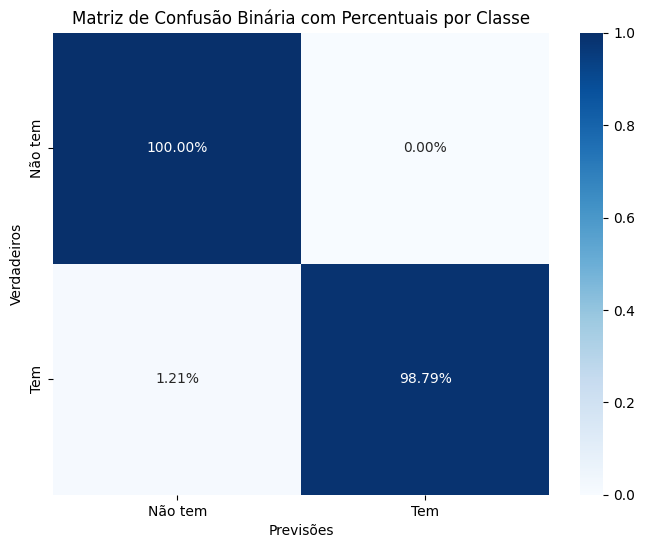

Acurácia da classe 'Não tem': 100.00%
Acurácia da classe 'Tem': 98.79%
Acurácia geral do modelo: 99.07%


In [388]:
# Criar uma instância do modelo SVR com kernel rbf
svr = SVR(kernel='rbf')
# Realizar a validação cruzada (por exemplo, com 5-fold)
cv_scores = cross_val_score(svr, X, Y, cv=10, scoring='neg_mean_absolute_error')
# Calcular a média dos scores e inverter o sinal (porque a função de scoring retorna negativo)
mean_cv_score = -np.mean(cv_scores)
# Treinar o modelo SVR com seus dados de treinamento
svr.fit(X_train, Y_train)
# Fazer previsões com o modelo treinado
y_pred_svr = svr.predict(X_test)
# Métricas 
mae = mean_absolute_error(Y_test, y_pred_svr)
mse = mean_squared_error(Y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_svr)



# Exibir o MAE nos dados de teste
print("Métricas de Avaliação: \n MAE: %s \n MSE: %s \n RMSE: %s \n R2: %s" %(mae, mse, rmse, r2 ))
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Definindo um limiar para classificar as saídas como 'Tem' ou 'Não tem'
threshold = 0.5
# Discretizando os valores verdadeiros e as previsões
Y_test_discrete = (Y_test >= threshold).astype(int)
y_pred_svr_discrete = (y_pred_svr >= threshold).astype(int)
# Definindo as labels para a matriz de confusão
labels = ['Não tem', 'Tem']
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(Y_test_discrete, y_pred_svr_discrete, labels=[0, 1])
# Calculando a acurácia por classe
accuracy_per_class = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
# Criando uma nova matriz de confusão para exibir as porcentagens
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
# Plotando a matriz de confusão com porcentagens
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, ax=ax, cmap='Blues', fmt='.2%', xticklabels=labels, yticklabels=labels)
# Configurando título e eixos
ax.set_title('Matriz de Confusão Binária com Percentuais por Classe')
ax.set_xlabel('Previsões')
ax.set_ylabel('Verdadeiros')
plt.show()

# Exibindo a acurácia por classe
for i, label in enumerate(labels):
    print(f"Acurácia da classe '{label}': {accuracy_per_class[i]:.2%}")
# Exibindo a acurácia geral
accuracy_svr = accuracy_score(Y_test_discrete, y_pred_svr_discrete)
print(f"Acurácia geral do modelo: {accuracy_svr:.2%}")

## Classificador Random Florest 

In [389]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializando o modelo Random Forest com o número desejado de árvores
# n_estimators é o número de árvores na floresta
rf = RandomForestClassifier(n_estimators=1000, random_state=seed)

# Treinando o modelo com os dados de treinamento
rf.fit(X_train, Y_train)

# Fazendo previsões no conjunto de teste
Y_pred_rf = rf.predict(X_test)

# Calculando a acurácia
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)

# Obtendo a matriz de confusão
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

# Obtendo o relatório de classificação
classification_report_rf = classification_report(Y_test, Y_pred_rf)

# Imprimindo os resultados
print(f"Acurácia geral do modelo: {accuracy_rf:.2%}")
print(f'Matriz de confusão (Random Forest):\n {confusion_matrix_rf}')
print(f'Relatório de classificação (Random Forest):\n {classification_report_rf}')


Acurácia geral do modelo: 98.92%
Matriz de confusão (Random Forest):
 [[150   1]
 [  6 489]]
Relatório de classificação (Random Forest):
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       151
         1.0       1.00      0.99      0.99       495

    accuracy                           0.99       646
   macro avg       0.98      0.99      0.99       646
weighted avg       0.99      0.99      0.99       646



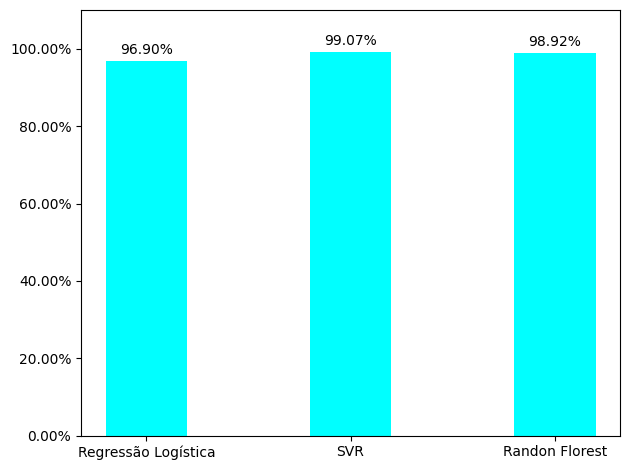

In [390]:
import matplotlib.pyplot as plt
import numpy as np

# Nomes dos modelos
models = ['Regressão Logística', 'SVR', 'Randon Florest']

# Acurácias dos modelos
accuracies = [accuracy_rl * 100, accuracy_svr * 100, accuracy_rf * 100] # Substitua com as acurácias reais dos seus modelos

# Configurações do gráfico
index = np.arange(len(models))  # Localização dos modelos
bar_width = 0.4  # Largura das barras

# Criando barras para os modelos
fig, ax = plt.subplots()
bars = ax.bar(index, accuracies, bar_width, color='cyan')

# Adicionando os rótulos de porcentagem nas barras com duas casas decimais
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Configurações finais do gráfico

ax.set_xticks(index)
ax.set_xticklabels(models)
ax.set_ylim(0, 110)  # Ajuste para 110 para dar espaço para o rótulo de 100%

# Configurar o formato do eixo Y para porcentagem com duas casas decimais
ax.yaxis.set_major_formatter(PercentFormatter(decimals=2))

# Use tight_layout para ajustar o layout do subplot
plt.tight_layout()

# Exibir o gráfico
plt.show()

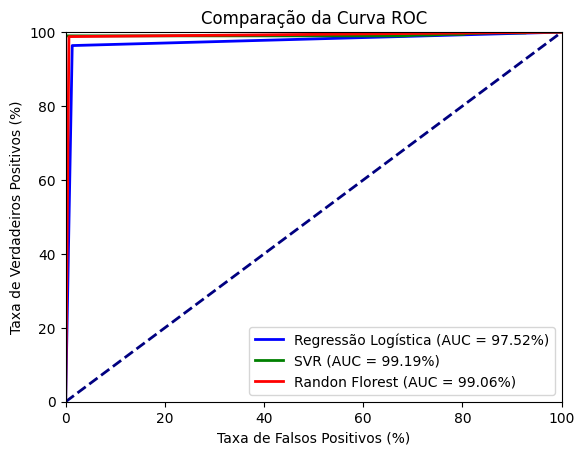

In [391]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Suponha que você tenha os valores verdadeiros e os scores previstos para cada modelo
y_true = Y_test  # rótulos verdadeiros
y_score_model1 = Y_predRegLog  # scores do modelo 1
y_score_model2 = y_pred_svr  # scores do modelo 2
y_score_model3 = Y_pred_rf  # scores do modelo 3

# Calcular FPR, TPR e AUC para cada modelo
fpr1, tpr1, _ = roc_curve(y_true, y_score_model1)
fpr2, tpr2, _ = roc_curve(y_true, y_score_model2)
fpr3, tpr3, _ = roc_curve(y_true, y_score_model3)
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

# Converter as taxas para porcentagem
fpr1, tpr1 = fpr1 * 100, tpr1 * 100
fpr2, tpr2 = fpr2 * 100, tpr2 * 100
fpr3, tpr3 = fpr3 * 100, tpr3 * 100

# Criar a figura
plt.figure()

# Plotar a curva ROC para cada modelo em porcentagem
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Regressão Logística (AUC = %0.2f%%)' % (auc1 * 100))
plt.plot(fpr2, tpr2, color='green', lw=2, label='SVR (AUC = %0.2f%%)' % (auc2 * 100))
plt.plot(fpr3, tpr3, color='red', lw=2, label='Randon Florest (AUC = %0.2f%%)' % (auc3 * 100))

# Plotar a linha de não-discriminação
plt.plot([0, 100], [0, 100], color='navy', lw=2, linestyle='--')

# Adicionar rótulos e título
plt.xlim([0.0, 100.0])
plt.ylim([0.0, 100.0])
plt.xlabel('Taxa de Falsos Positivos (%)')
plt.ylabel('Taxa de Verdadeiros Positivos (%)')
plt.title('Comparação da Curva ROC')
plt.legend(loc="lower right")

# Mostrar o gráfico
plt.show()





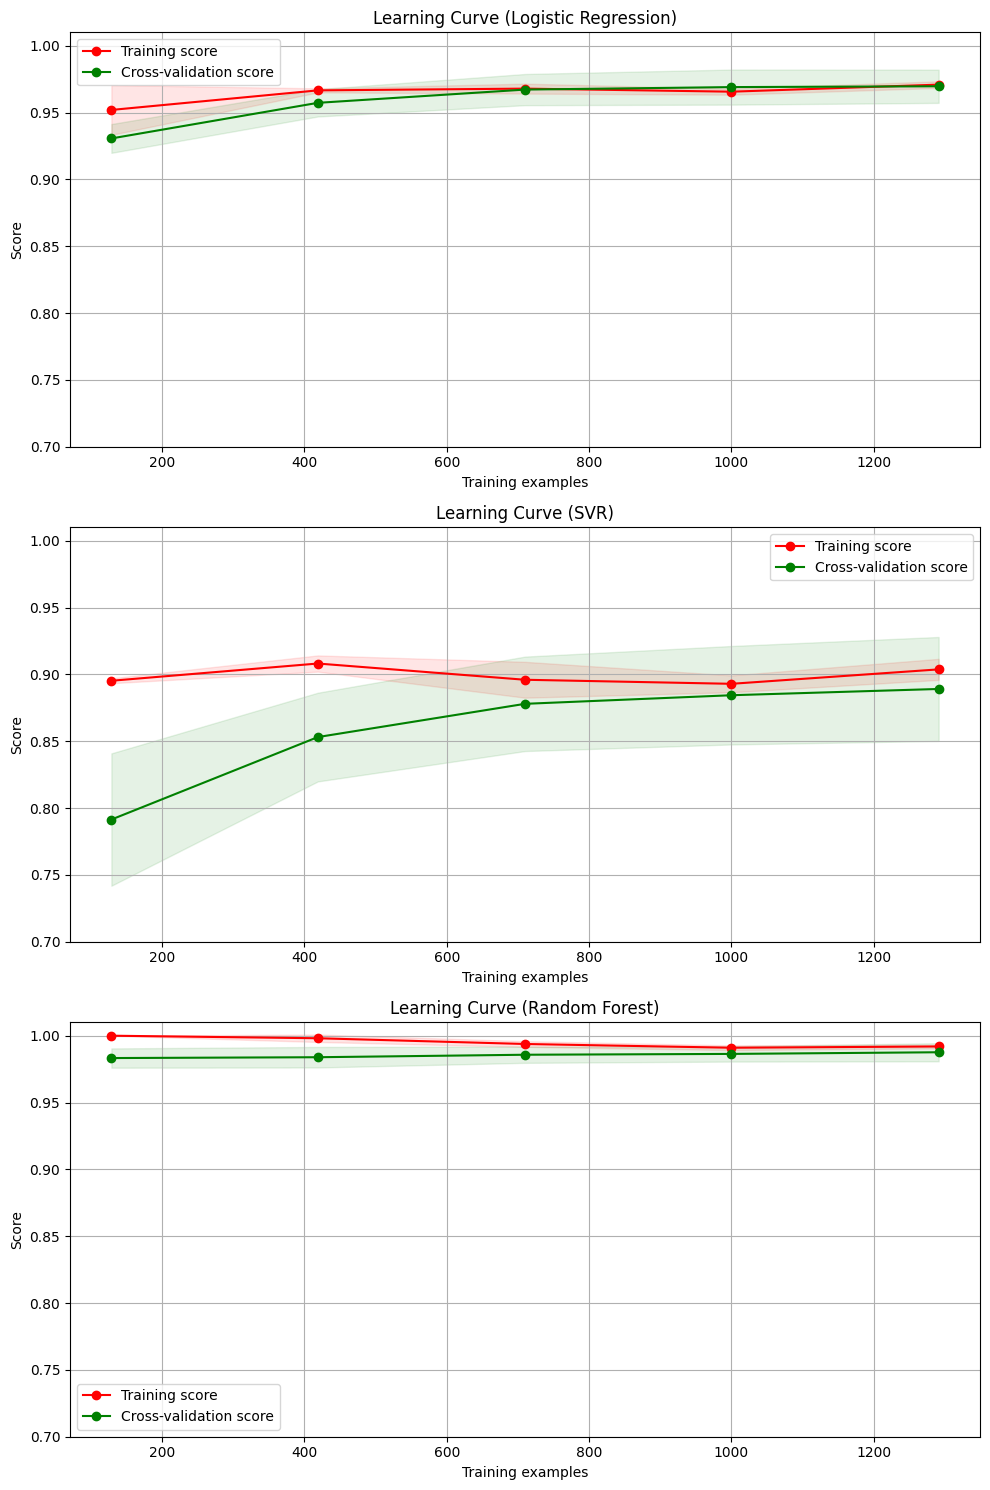

In [392]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")

    axes.legend(loc="best")

    return plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot learning curve for Logistic Regression
plot_learning_curve(RegLog, "Learning Curve (Logistic Regression)", X, Y, axes=axes[0], ylim=(0.7, 1.01), cv=5, n_jobs=4)

# Plot learning curve for SVR
# Note: You might need to adjust the SVR model parameters or the scale of your data for this to work properly
plot_learning_curve(svr, "Learning Curve (SVR)", X, Y, axes=axes[1], ylim=(0.7, 1.01), cv=5, n_jobs=4)

# Plot learning curve for Random Forest
plot_learning_curve(rf, "Learning Curve (Random Forest)", X, Y, axes=axes[2], ylim=(0.7, 1.01), cv=5, n_jobs=4)

plt.tight_layout()
plt.show()


# Realizando novas Previsões

In [393]:
# Novos dados de entrada 
# Array com diagnóstico de depressão [1, 4, 3, 5, 32, 3, 4, 1, 4, 4, 4, 4, 1]
# Array com diagnóstico de nada 
new_data_values = [1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
new_data = pd.DataFrame([new_data_values], columns=X_train.columns) # substitua isso pelos seus novos dados de entrada


new_data

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida
0,1,1,1,0,0,0,0,0,2,0,0,0,0


In [394]:
new_prediction_reglog = RegLog.predict(new_data)

In [395]:
new_prediction_reglog

array([1.])

## Regressão Logística:

## Máquina de Vetores de Suporte (SVR):

In [396]:
# Fazer a previsão
new_prediction_svr = svr.predict(new_data_processed)

# Discretizar a previsão se estiver tratando de um problema de classificação
new_prediction_svr_discrete = (new_prediction_svr >= threshold).astype(int)

# Avaliar a previsão (se tiver o resultado real)
print(new_prediction_svr_discrete == real_outcome)


ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Random Forest:

In [ ]:
# Fazer a previsão
new_prediction_rf = rf.predict(new_data_processed)

# Avaliar a previsão (se tiver o resultado real)
print(new_prediction_rf == real_outcome)
